In [211]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

**Import the data**

In [156]:
offline_test = pd.read_csv("ccf_offline_stage1_test_revised.csv", parse_dates=['Date_received'])
offline_train = pd.read_csv("ccf_offline_stage1_train.csv", parse_dates=['Date_received', 'Date'])
online_train = pd.read_csv("ccf_online_stage1_train.csv", parse_dates=['Date_received', 'Date'])

In [41]:
offline_test[:20]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1.0,2016-07-12
1,6949378,1300,3429,30:5,NaN,2016-07-06
2,2166529,7113,6928,200:20,5.0,2016-07-27
3,2166529,7113,1808,100:10,5.0,2016-07-27
4,6172162,7605,6500,30:1,2.0,2016-07-08
5,4005121,450,9983,30:5,0.0,2016-07-06
6,4347394,450,9983,30:5,0.0,2016-07-16
7,3094273,760,13602,30:5,1.0,2016-07-27
8,5139970,450,9983,30:5,10.0,2016-07-29
9,3237121,760,13602,30:5,1.0,2016-07-03


In [42]:
offline_train[:20]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT


In [43]:
online_train[:20]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,2016-05-13,NaT
1,13740231,34805,1,NaN,NaN,NaT,2016-03-21
2,14336199,18907,0,NaN,NaN,NaT,2016-06-18
3,14336199,18907,0,NaN,NaN,NaT,2016-06-18
4,14336199,18907,0,NaN,NaN,NaT,2016-06-18
5,14336199,18907,0,NaN,NaN,NaT,2016-06-18
6,14336199,18907,0,NaN,NaN,NaT,2016-06-18
7,14336199,18907,0,NaN,NaN,NaT,2016-06-18
8,14336199,18907,0,NaN,NaN,NaT,2016-06-18
9,14336199,18907,0,NaN,NaN,NaT,2016-06-18


**Explore the data sets**

In the offline dataset, "Distance" is a feature that doesn't appear in the online dataset, while "Action" appears in the online dataset but not in the offline dataset.

In [44]:
print(offline_train.columns)
print(online_train.columns)

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date'],
      dtype='object')
Index(['User_id', 'Merchant_id', 'Action', 'Coupon_id', 'Discount_rate',
       'Date_received', 'Date'],
      dtype='object')


In "online_train" there are much more data, not using these data may reduce the performance of our model

In [45]:
print(len(offline_train))
print(len(online_train))

1754884
11429826


In [46]:
r = offline_train.iloc[1,:]
pd.isnull(r['Date'])

True

In [ ]:
def add_coupon_stat(df):
    l_coupon_stat = []
    for _, i in df.iterrows():
        if pd.isnull(i['Date']):
            if pd.isnull(i['Coupon_id']):
                l_coupon_stat.append(0)
            else:
                l_coupon_stat.append(3)
        else:
            if pd.isnull(i['Coupon_id']):
                l_coupon_stat.append(2)
            else:
                l_coupon_stat.append(1)
    return df.join(pd.DataFrame(l_coupon_stat, columns=['Coupon_stat']))

add_coupon_stat(offline_train.copy())

In [9]:
online_train['Distance'] = -1

In [10]:
online_train[:20]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Distance
0,13740231,18907,2,100017492,500:50,20160513.0,NaN,-1
1,13740231,34805,1,NaN,NaN,NaN,20160321.0,-1
2,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1
3,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1
4,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1
5,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1
6,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1
7,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1
8,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1
9,14336199,18907,0,NaN,NaN,NaN,20160618.0,-1


In [201]:
import matplotlib.pyplot as plt

C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([array([0.3455, 0.2218, 0.1521, 0.0971, 0.0633, 0.0393, 0.0259, 0.0192,
         0.0122, 0.0236]),
  array([0.50098825, 0.13780315, 0.07181416, 0.04645453, 0.0334075 ,
         0.02513947, 0.01970003, 0.0155748 , 0.01300033, 0.13611777])],
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 Lists of Patches objects>)

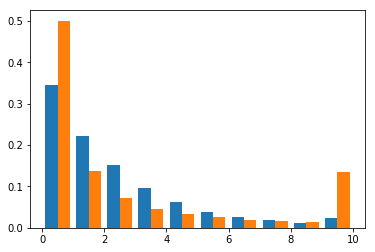

In [209]:
distance = offline_train['Distance'].dropna(how='any')
generate = np.random.exponential(distance.mean(), size = 10000)
generate[generate>10] = 10
plt.hist([generate,distance], normed=True)

In [ ]:
mean_distance = offline_train['Distance'].mean()

def fill_nan_distance(row):
    return row.fillna({'Distance': np.random.exponential(mean_distance)})

offline_train_distance = offline_train.apply(fill_nan_distance, axis=1)

In [47]:
offline_train_distance = pd.read_csv("offline_train.csv", parse_dates=['Date_received', 'Date'])
tmp = (offline_train['Date'] - offline_train['Date_received']).apply(lambda x: x.days)

In [232]:
tmp.mean()

7.817065081849779

In [233]:
tmp.max()

96.0

In [ ]:
industrys = offline_train['User_id'].unique()
offline_train_user = pd.DataFrame(columns=['User_id', 'N_buy_in_15', 'N_buy_out_15', 'N_buy_without_coupon', 'N_recieve'])

for (count, item) in tqdm(enumerate(industrys), total=len(industrys)):
    
    t = offline_train['User_id'] == item
    
    n_buy_in_15 = offline_train[t][tmp[t] <= 15]['Date'].count().astype('int')
    n_buy_out_15 = offline_train[t][tmp[t] > 15]['Date'].count().astype('int')
    n_buy_without_coupon = offline_train[t][pd.isnull(offline_train[t]['Date_received'])]['Date'].count().astype('int')
    n_recieve = offline_train[t]['Date_received'].count().astype('int')
    offline_train_user = offline_train_user.append(
        [{'User_id': item, 
          'N_buy_in_15': n_buy_in_15, 
          'N_buy_out_15': n_buy_out_15, 
          'N_buy_without_coupon': n_buy_without_coupon, 
          'N_recieve': n_recieve}])

In [162]:
industrys = offline_train['User_id'].unique()
offline_train_user = pd.DataFrame(columns=['User_id'], data=industrys)
offline_train_user['N_buy_in_15'] = 0
offline_train_user['N_buy_out_15'] = 0
offline_train_user['N_buy_without_coupon'] = 0
offline_train_user['N_receive'] = 0

In [163]:
offline_train_user.set_index('User_id', inplace=True)
for _, i in tqdm(offline_train.iterrows(), total=len(offline_train)):
    index = i['User_id']
    if not pd.isnull(i['Date_received']):
        offline_train_user.loc[index, 'N_receive'] += 1
    if not pd.isnull(i['Date']):
        if tmp[_] <= 15:
            offline_train_user.loc[index, 'N_buy_in_15'] += 1
        elif tmp[_] > 15:
            offline_train_user.loc[index, 'N_buy_out_15'] += 1
        else:
            offline_train_user.loc[index, 'N_buy_without_coupon'] += 1
offline_train_user = offline_train_user.reset_index()

C:\Users\IE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,User_id,N_buy_in_15,N_buy_out_15,N_buy_without_coupon,N_receive
0,1439408,0,1,2,5
1,1832624,0,0,0,1
2,2029232,0,0,2,3
3,2747744,0,0,0,1
4,196342,0,0,1,1
5,2223968,0,0,0,1
6,73611,0,0,0,1
7,163606,0,0,0,1
8,3273056,0,0,0,1
9,94107,0,0,0,1


In [236]:
offline_train_user = pd.read_csv("offline_train_user.csv")

In [96]:
import seaborn as sns

In [210]:
offline_train_user.to_csv('offline_train_user.csv', index_label=False)

In [217]:
offline_train_user.max()

User_id                 7361032
N_buy_in_15                 118
N_buy_out_15                 14
N_buy_without_coupon        168
N_receive                   120
dtype: int64

In [218]:
offline_train_user.mean()

User_id                 3.685150e+06
N_buy_in_15             1.193742e-01
N_buy_out_15            2.036749e-02
N_buy_without_coupon    1.300617e+00
N_receive               1.952554e+00
dtype: float64

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


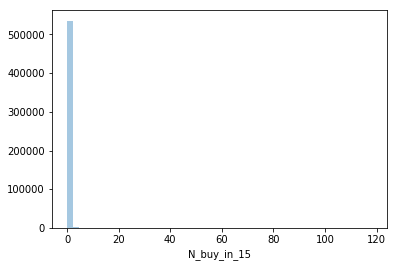

In [219]:
sns.distplot(offline_train_user['N_buy_in_15'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


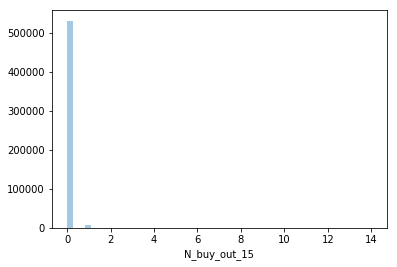

In [175]:
sns.distplot(offline_train_user['N_buy_out_15'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


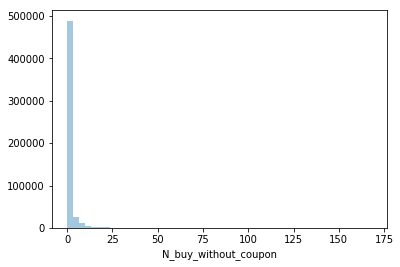

In [178]:
sns.distplot(offline_train_user['N_buy_without_coupon'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


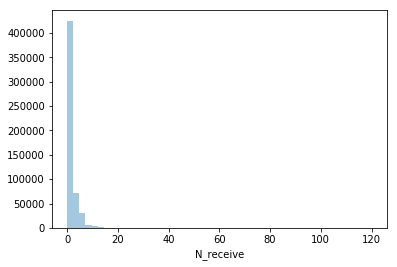

In [180]:
sns.distplot(offline_train_user['N_receive'], kde=False)

In [231]:
offline_train_user[offline_train_user!=0].count()/len(offline_train_user)

User_id                 1.000000
N_buy_in_15             0.074290
N_buy_out_15            0.017637
N_buy_without_coupon    0.384880
N_receive               0.946722
dtype: float64

In [250]:
offline_train_user[:10]

,User_id,N_buy_in_15,N_buy_out_15,N_buy_without_coupon,N_receive
0,1439408,0,1,2,5
1,1832624,0,0,0,1
2,2029232,0,0,2,3
3,2747744,0,0,0,1
4,196342,0,0,1,1
5,2223968,0,0,0,1
6,73611,0,0,0,1
7,163606,0,0,0,1
8,3273056,0,0,0,1
9,94107,0,0,0,1


In [237]:
industrys = offline_train['Merchant_id'].unique()
offline_train_merchant = pd.DataFrame(columns=['Merchant_id'], data=industrys)
offline_train_merchant['N_buy_in_15'] = 0
offline_train_merchant['N_buy_out_15'] = 0
offline_train_merchant['N_buy_without_coupon'] = 0
offline_train_merchant['N_receive'] = 0

offline_train_merchant.set_index('Merchant_id', inplace=True)
for _, i in tqdm(offline_train.iterrows(), total=len(offline_train)):
    index = i['Merchant_id']
    if not pd.isnull(i['Date_received']):
        offline_train_merchant.loc[index, 'N_receive'] += 1
    if not pd.isnull(i['Date']):
        if tmp[_] <= 15:
            offline_train_merchant.loc[index, 'N_buy_in_15'] += 1
        elif tmp[_] > 15:
            offline_train_merchant.loc[index, 'N_buy_out_15'] += 1
        else:
            offline_train_merchant.loc[index, 'N_buy_without_coupon'] += 1
offline_train_merchant = offline_train_merchant.reset_index()

In [239]:
offline_train_merchant.to_csv('offline_train_merchant.csv', index_label=False)

In [246]:
offline_train_merchant[:10]

,Merchant_id,N_buy_in_15,N_buy_out_15,N_buy_without_coupon,N_receive
0,2632,1,3,17,43
1,4663,56,20,1358,15191
2,3381,1553,934,19356,122834
3,450,1010,451,10824,63042
4,6459,0,0,20,16
5,6901,817,177,11787,13886
6,1579,1,0,53,15
7,2099,1333,372,7533,16824
8,1569,114,38,918,33600
9,4833,95,21,643,8321


In [241]:
offline_train_merchant.max()

Merchant_id               8856
N_buy_in_15               4216
N_buy_out_15              1437
N_buy_without_coupon     30585
N_receive               122834
dtype: int64

In [243]:
offline_train_merchant.mean()

Merchant_id             4420.529174
N_buy_in_15                7.652406
N_buy_out_15               1.305645
N_buy_without_coupon      83.375163
N_receive                125.167201
dtype: float64

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


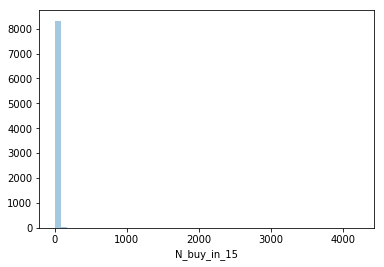

In [244]:
sns.distplot(offline_train_merchant['N_buy_in_15'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


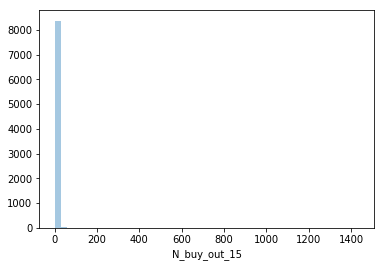

In [245]:
sns.distplot(offline_train_merchant['N_buy_out_15'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


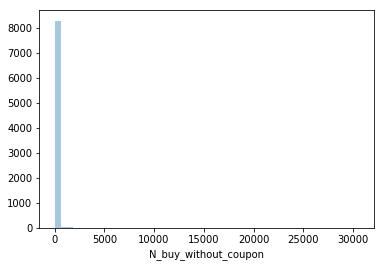

In [247]:
sns.distplot(offline_train_merchant['N_buy_without_coupon'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


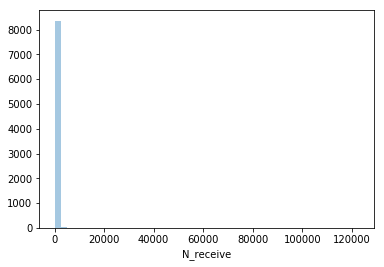

In [249]:
sns.distplot(offline_train_merchant['N_receive'], kde=False)

In [251]:
industrys = offline_train['Coupon_id'].unique()
offline_train_coupon = pd.DataFrame(columns=['Coupon_id'], data=industrys)
offline_train_coupon['N_buy_in_15'] = 0
offline_train_coupon['N_buy_out_15'] = 0
offline_train_coupon['N_buy_without_coupon'] = 0
offline_train_coupon['N_receive'] = 0

offline_train_coupon.set_index('Coupon_id', inplace=True)
for _, i in tqdm(offline_train.iterrows(), total=len(offline_train)):
    index = i['Coupon_id']
    if not pd.isnull(i['Date_received']):
        offline_train_coupon.loc[index, 'N_receive'] += 1
    if not pd.isnull(i['Date']):
        if tmp[_] <= 15:
            offline_train_coupon.loc[index, 'N_buy_in_15'] += 1
        elif tmp[_] > 15:
            offline_train_coupon.loc[index, 'N_buy_out_15'] += 1
        else:
            offline_train_coupon.loc[index, 'N_buy_without_coupon'] += 1
offline_train_coupon = offline_train_coupon.reset_index()

In [254]:
offline_train_merchant.to_csv('offline_train_coupon.csv', index_label=False)

In [252]:
offline_train_coupon.max()

Coupon_id                14045.0
N_buy_in_15               2434.0
N_buy_out_15               672.0
N_buy_without_coupon    701602.0
N_receive                46729.0
dtype: float64

In [253]:
offline_train_coupon.mean()

Coupon_id               7045.659068
N_buy_in_15                6.612075
N_buy_out_15               1.128145
N_buy_without_coupon      72.040456
N_receive                108.150940
dtype: float64

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


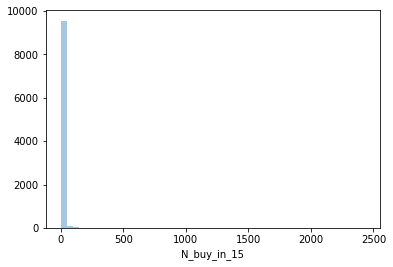

In [255]:
sns.distplot(offline_train_coupon['N_buy_in_15'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


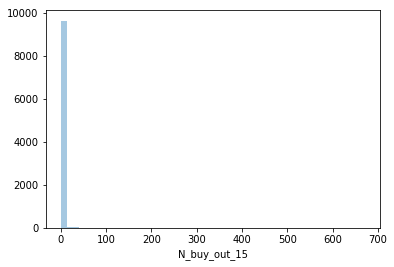

In [256]:
sns.distplot(offline_train_coupon['N_buy_out_15'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


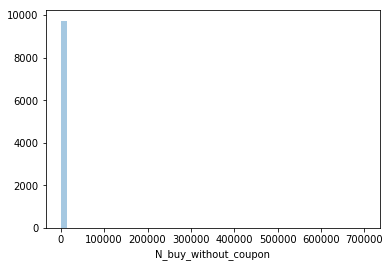

In [257]:
sns.distplot(offline_train_coupon['N_buy_without_coupon'], kde=False)

C:\Users\IE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


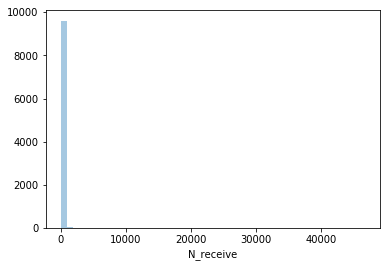

In [258]:
sns.distplot(offline_train_coupon['N_receive'], kde=False)